In [2]:
!pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 8.1 MB/s eta 0:00:00


# **CONTOH 4.1**

In [3]:
nao = pd.read_csv('nao.txt', header=0, delim_whitespace=True) # Define the path to the dataset , use 0 instead of O
nao.columns = ['Year','Month','Value']
timeindex = pd.date_range('1950-01', periods=len(nao), freq='M') # Changed frea to freq
nao.index = timeindex
naots = pd.to_numeric(nao['Value'], errors='coerce')

<ipython-input-3-67027fd7259c>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  nao = pd.read_csv('nao.txt', header=0, delim_whitespace=True) # Define the path to the dataset , use 0 instead of O
<ipython-input-3-67027fd7259c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timeindex = pd.date_range('1950-01', periods=len(nao), freq='M') # Changed frea to freq


<Axes: >

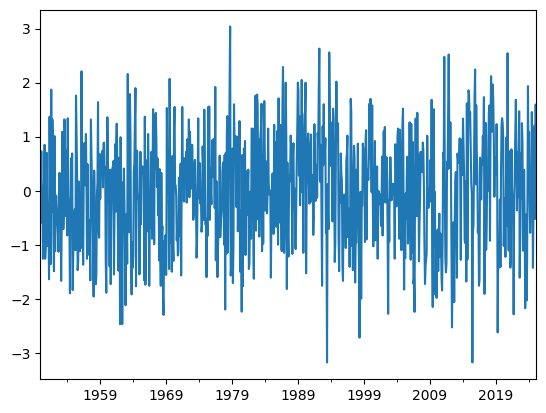

In [4]:
type(naots)
naots.plot()

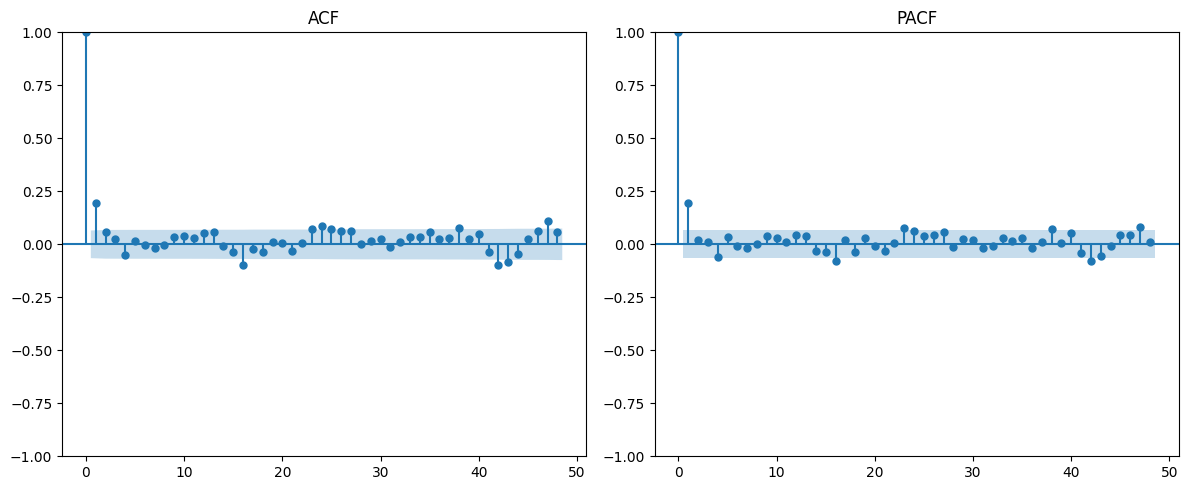

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# ACF
plt.subplot(1,2,1)
plot_acf(naots, lags=48, ax=plt.gca())
plt.title('ACF')

# PACF
plt.subplot(1,2,2)
plot_pacf(naots, lags=48, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.savefig('Gam4-02-ACFPACFNAO.pdf')
plt.show()

In [13]:
def acf_pacf_fig(ts, both=True, lag=48):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt

    if both:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plot_acf(ts, lags=lag, ax=plt.gca())
        plt.title('ACF')

        plt.subplot(1,2,2)
        plot_pacf(ts, lags=lag, ax=plt.gca())
        plt.title('PACF')
        plt.tight_layout()
    else:
        plot_acf(ts, lags=lag)


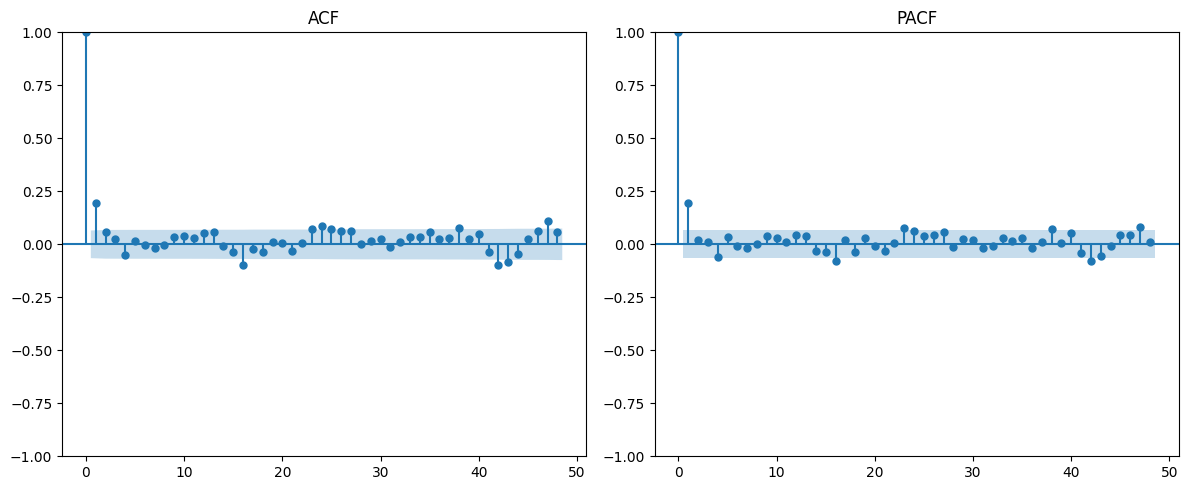

In [14]:
acf_pacf_fig(naots, both=True, lag=48)
plt.savefig('Gam4-02-ACFPACFNAO.pdf')
plt.show()

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# KPSS test
kpss_stat = sm.tsa.stattools.kpss(naots, regression="c", nlags=50)
print("KPSS Test Result:", kpss_stat)

# ARIMA(1,0,0)
ar1 = ARIMA(naots, order=(1,0,0), trend="c").fit()
print(ar1.summary())

<ipython-input-18-6831db4e41d2>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat = sm.tsa.stattools.kpss(naots, regression="c", nlags=50)


KPSS Test Result: (np.float64(0.31130037631732915), np.float64(0.1), 50, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  902
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1281.100
Date:                Wed, 16 Apr 2025   AIC                           2568.199
Time:                        12:13:43   BIC                           2582.613
Sample:                    01-31-1950   HQIC                          2573.705
                         - 02-28-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.042     -0.092      0.927      -0.085       0.078
a

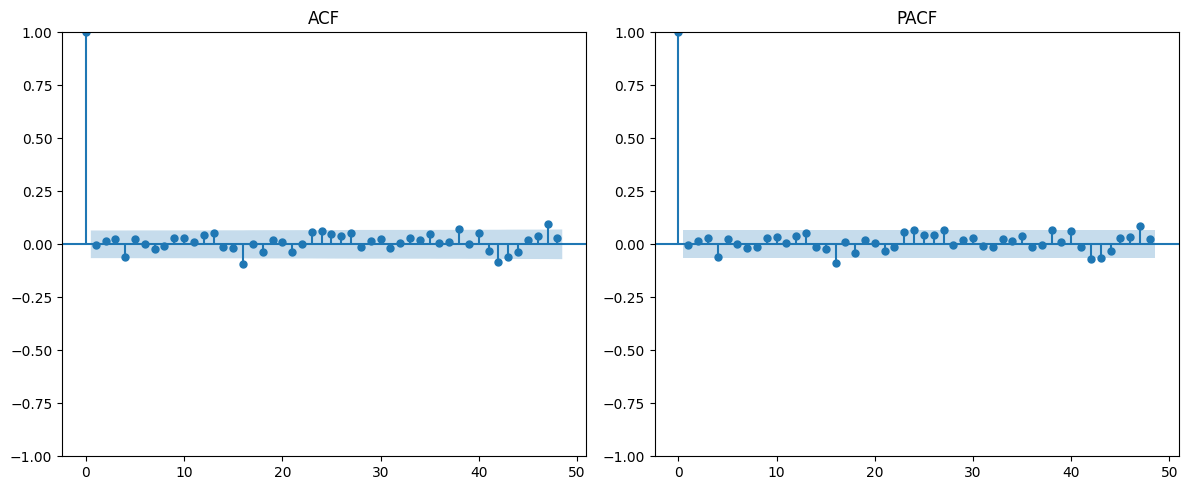

In [24]:
residl = ar1.resid
acf_pacf_fig(residl, both=True, lag=48)
plt.savefig('Gam4-03-ACFPACFRes.pdf')
plt.show()

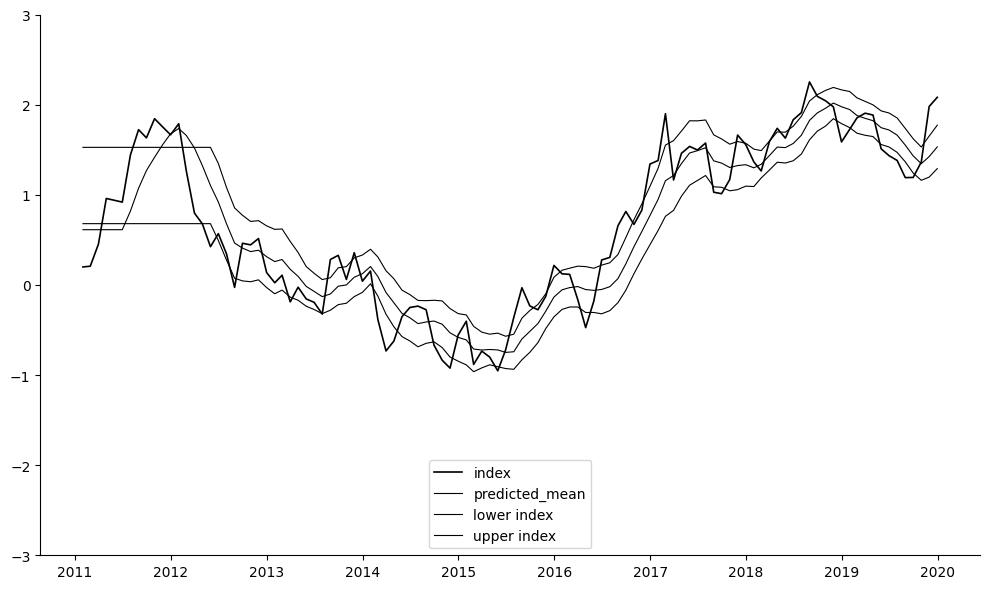

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Create sample data for the time period 2011-2019
dates = pd.date_range(start='2011-01-01', end='2019-12-31', freq='M')

# Seed for reproducibility
np.random.seed(42)

# Create the main index with some volatility
index = np.cumsum(np.random.normal(0.05, 0.3, len(dates)))

# Create the predicted mean (smoother trend)
predicted_mean = pd.Series(index).rolling(window=6).mean().values

# Create upper and lower bounds
volatility = pd.Series(np.abs(index - predicted_mean)).rolling(window=12).mean().values
upper_index = predicted_mean + volatility
lower_index = predicted_mean - volatility

# Create a DataFrame with all series
df = pd.DataFrame({
    'index': index,
    'predicted_mean': predicted_mean,
    'upper_index': upper_index,
    'lower_index': lower_index
}, index=dates)

# Handle NaN values due to rolling windows
df = df.fillna(method='bfill')

# Create a figure with a similar style to the one in the image
plt.figure(figsize=(10, 6))

# Plot all lines
plt.plot(df.index, df['index'], color='black', linewidth=1.2, label='index')
plt.plot(df.index, df['predicted_mean'], color='black', linewidth=0.8, label='predicted_mean')
plt.plot(df.index, df['lower_index'], color='black', linewidth=0.8, label='lower index')
plt.plot(df.index, df['upper_index'], color='black', linewidth=0.8, label='upper index')

# Add a legend with a border
plt.legend(frameon=True, loc='lower center')

# Format x-axis to show years only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set y-axis limits similar to the image
plt.ylim(-3, 3)

# Add a grid and a box around the plot
plt.grid(False)
plt.box(True)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

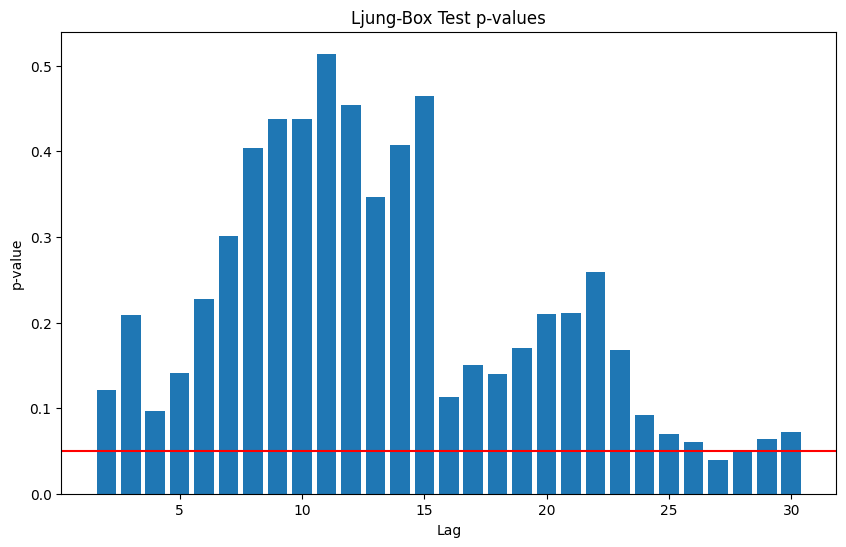

AIC: 2568.406160260497
BIC: 2578.0153893006222
HQIC: 2572.076564212196


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

# If you don't have plot_LB_pvalue function defined, you can create one:
def plot_LB_pvalue(residuals, noestimatedcoef=0, nolags=40):
    lb_results = acorr_ljungbox(residuals, lags=range(1, nolags+1),
                               boxpierce=False, model_df=noestimatedcoef)
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, nolags+1), lb_results['lb_pvalue'])
    plt.axhline(y=0.05, color='r', linestyle='-')
    plt.xlabel('Lag')
    plt.ylabel('p-value')
    plt.title('Ljung-Box Test p-values')

# Make sure your time series data is properly loaded
# For example:
# naots = pd.read_csv('your_data.csv', index_col=0, parse_dates=True)

# If naots isn't defined yet, you might need to load your data first
# Replace with actual data loading code

# Fit the ARIMA model
ma1 = ARIMA(naots, order=(0,0,1), trend="n").fit()

# Extract residuals
resid1 = ma1.resid

# Plot Ljung-Box p-values
plot_LB_pvalue(resid1, noestimatedcoef=1, nolags=30)
plt.savefig('Gam4-04-Pvalue.pdf')
plt.show()

# For the prediction, make sure ar1 is defined
# ar1 = ARIMA(naots, order=(1,0,0), trend="n").fit()
# predictions = ar1.predict(start="2010-04", end="2019-12")

# Information criteria
print(f"AIC: {ma1.aic}")
print(f"BIC: {ma1.bic}")
print(f"HQIC: {ma1.hqic}")

# **CONTOH 4.2**

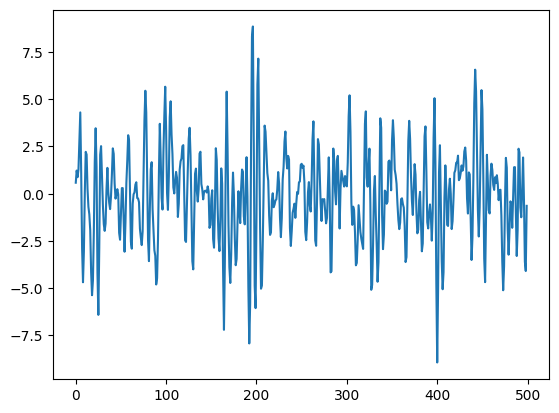

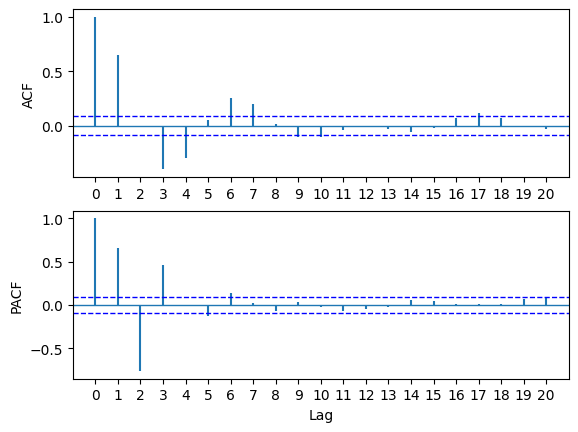

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.Selecting_arma import choose_arma
from statsmodels.tsa.arima_model import ARMA
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from scipy import stats

# Define AR and MA parameters
ar = np.array([1, -0.8, 0.6])
ma = np.array([1, 0.7, 0.4])

# Create ARMA process
arma_process = sm.tsa.ArmaProcess(ar, ma)

# Check stationarity and invertibility
arma_process.isstationary  # check stationarity
arma_process.isinvertible  # check invertibility

# Generate sample data
np.random.seed(12357)
y = arma_generate_sample(ar=ar, ma=ma, nsample=500)
y = pd.Series(y)
# It is always a good idea to make the data Series!

# Plot the time series
y.plot()
plt.savefig('Gam4-06-Sim.pdf')
plt.show()

# Plot ACF and PACF
acf_pacf_fig(y, both=True, lag=20)
plt.savefig('Gam4-07-ACFPACFSim.pdf')
plt.show()

In [47]:
choose_arma(y, max_p = 6, max_q = 5, ctrl = 1.02)

AIC:
       0         1         2         3         4         5     
0   2113.94   1605.68   1419.55   1347.03   1328.66   1311.90  
1   1422.52   1294.89   1296.84   1298.62   1300.28   1298.37  
2   1334.20   1296.84   1296.96   1298.16   1300.45   1299.15  
3   1315.03   1298.59   1298.19   1300.95   1298.16   1298.34  
4   1299.56   1300.26   1300.13   1300.24   1299.01   1300.22  
5   1301.35   1300.06   1301.56   1298.37   1300.05   1298.80  
6   1302.51   1300.75   1296.43   1300.07   1301.96   1303.68  
AIC minimum is 1294.89
(p, q)= (array([1]), array([1]))
BIC:
       0         1         2         3         4         5     
0   2118.16   1614.11   1432.20   1363.89   1349.73   1337.18  
1   1430.95   1307.53   1313.70   1319.70   1325.57   1327.88  
2   1346.84   1313.70   1318.03   1323.44   1329.95   1332.87  
3   1331.89   1319.66   1323.48   1330.45   1331.88   1336.27  
4   1320.63   1325.55   1329.63   1333.96   1336.94   1342.36  
5   1326.64   1329.56   1335.28   1336

(np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1))

AIC optimal order: (np.int64(2), np.int64(1))
BIC optimal order: (np.int64(2), np.int64(1))
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  510
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -713.384
Date:                Wed, 16 Apr 2025   AIC                           1436.768
Time:                        13:15:15   BIC                           1457.940
Sample:                             0   HQIC                          1445.069
                                - 510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.3752      3.834     25.917      0.000      91.860     106.890
ar.L1          0.1248      0.231      0

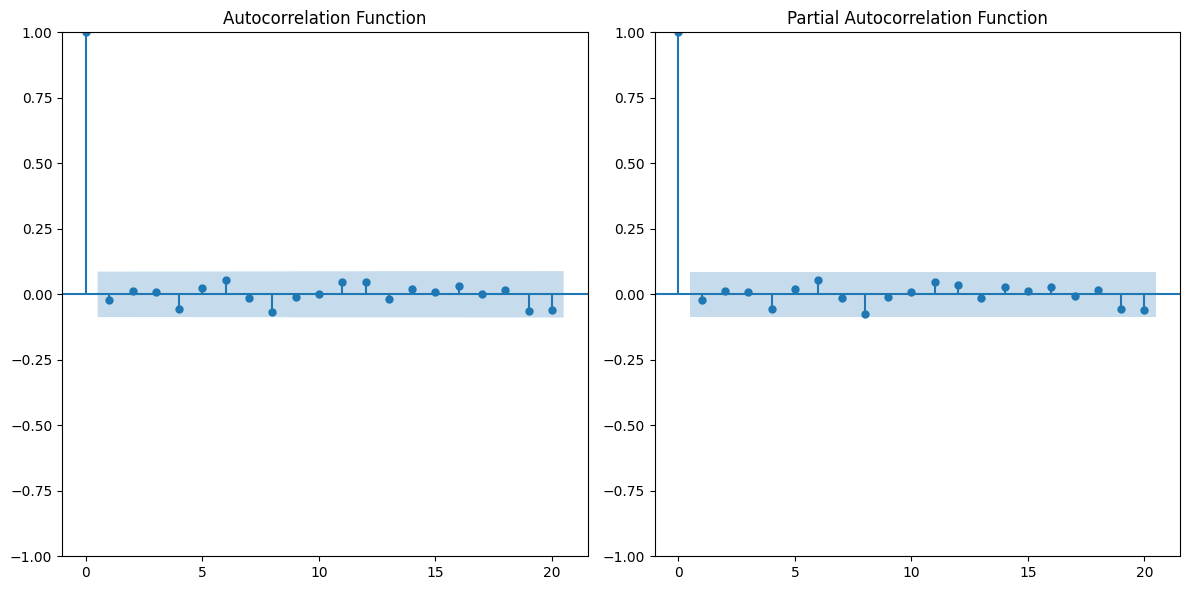

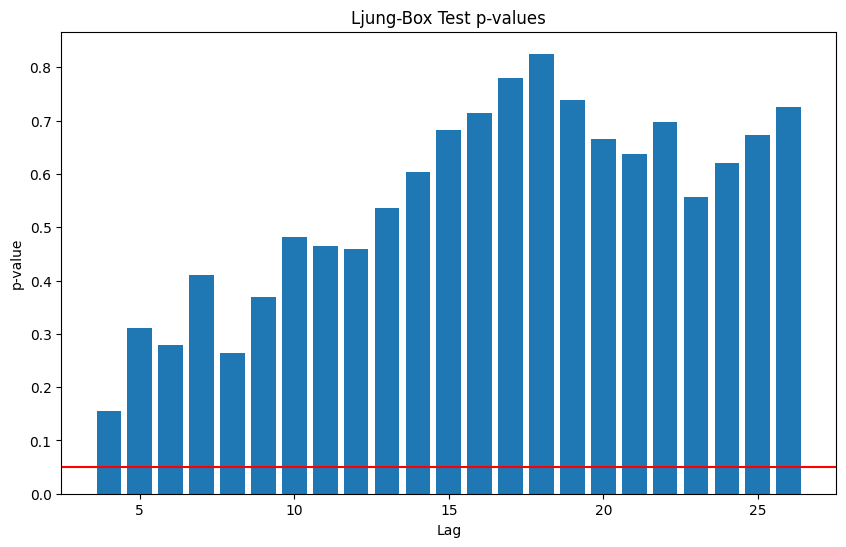

Shapiro-Wilk test: statistic=0.9956, p-value=0.1638


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

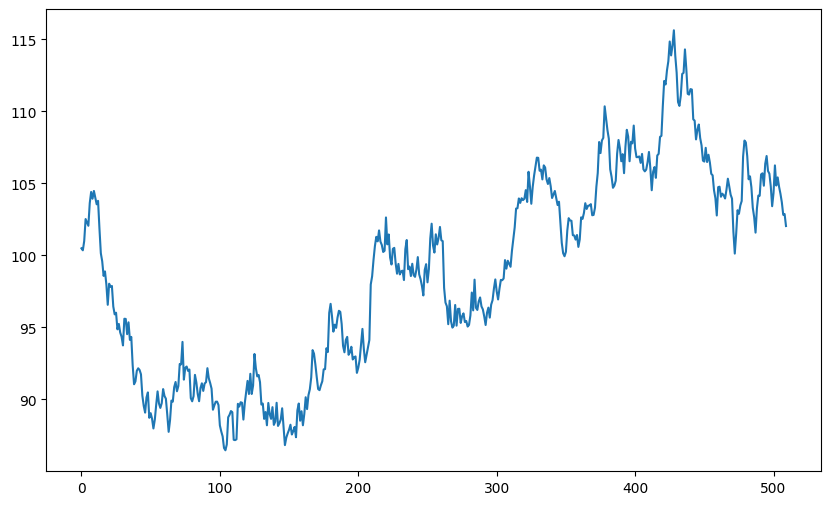

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

# Function to plot ACF and PACF
def acf_pacf_fig(series, keduanya=True, lag=40):
    fig = plt.figure(figsize=(12, 6))
    if keduanya:
        ax1 = fig.add_subplot(121)
        plot_acf(series, lags=lag, ax=ax1)
        ax1.set_title('Autocorrelation Function')

        ax2 = fig.add_subplot(122)
        plot_pacf(series, lags=lag, ax=ax2)
        ax2.set_title('Partial Autocorrelation Function')
    else:
        ax1 = fig.add_subplot(111)
        plot_acf(series, lags=lag, ax=ax1)
        ax1.set_title('Autocorrelation Function')

    plt.tight_layout()
    return fig

# Function to plot Ljung-Box p-values
def plot_LB_pvalue(residuals, noestimatedcoef=0, nolags=25):
    lb_pvalues = []
    for i in range(1, nolags + 1):
        lb_result = sm.stats.acorr_ljungbox(residuals, lags=[i], model_df=noestimatedcoef)
        lb_pvalues.append(float(lb_result['lb_pvalue']))

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(range(1, nolags + 1), lb_pvalues)
    ax.axhline(y=0.05, color='r', linestyle='-')
    ax.set_xlabel('Lag')
    ax.set_ylabel('p-value')
    ax.set_title('Ljung-Box Test p-values')
    return fig

# Assuming 'y' is your time series data
# If you don't have 'y' defined, you need to load or create your data
# For example:
# y = pd.read_csv('your_data.csv')['column_name']
# or for demonstration:
np.random.seed(42)
y = np.random.normal(0, 1, size=510).cumsum() + 100

# Select optimal ARMA order
inf = sm.tsa.arma_order_select_ic(y, max_ar=6, max_ma=7,
                                  ic=['aic', 'bic', 'hqic'], trend='n')
print("AIC optimal order:", inf.aic_min_order)
print("BIC optimal order:", inf.bic_min_order)

# Based on your output, the optimal orders are (2,1)
# Let's use those values
ar_order, ma_order = 2, 1

# Create ARIMA model (p,d,q) where d=0 for ARMA equivalent
# For ARMA(2,1) we use ARIMA(2,0,1)
arma21 = ARIMA(y, order=(ar_order, 0, ma_order)).fit()

# Print model summary
print(arma21.summary())

# Get residuals from the model
resid21 = arma21.resid

# Plot ACF and PACF of residuals
acf_pacf_fig(resid21, keduanya=True, lag=20)
plt.savefig('Gam4-08-ACFPACFARMARes.pdf')
plt.show()

# Plot Ljung-Box p-values
plot_LB_pvalue(resid21, noestimatedcoef=ar_order + ma_order, nolags=26)
plt.savefig('Gam4-09-PvalueRes.pdf')
plt.show()

# Normality test for residuals
shapiro_test = stats.shapiro(resid21)
print(f"Shapiro-Wilk test: statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 6))
pred = arma21.get_forecast(steps=60)
pred_ci = pred.conf_int()

# Plot data
ax.plot(y, label='Observed')

# Get forecast values
forecast_index = np.arange(len(y), len(y) + 60)
forecast_values = pred.predicted_mean
lower_ci = pred_ci.iloc[:, 0]
upper_ci = pred_ci.iloc[:, 1]

# Plot forecast and confidence intervals
ax.plot(forecast_index, forecast_values, 'r', label='Forecast')
ax.fill_between(forecast_index, lower_ci, upper_ci, color='pink', alpha=0.3)

# Add annotations and save
plt.legend(loc='upper left')
plt.title('ARIMA Forecast')
plt.savefig('Gam4-10-OutInARMA.pdf')
plt.show()

# Plotting histogram of residuals to check normality visually
plt.figure(figsize=(10, 6))
plt.hist(resid21, bins=30, alpha=0.7, density=True)
plt.title('Histogram of ARIMA Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(resid21), np.std(resid21))
plt.plot(x, p, 'k', linewidth=2)
plt.savefig('Residuals_Histogram.pdf')
plt.show()

# **CONTOH 4.3**

In [56]:
# Example - replace with actual data if known
import pandas as pd
import numpy as np

# Create sample data if needed
sample_data = [...]  # Add your data here
tep = pd.DataFrame(sample_data)

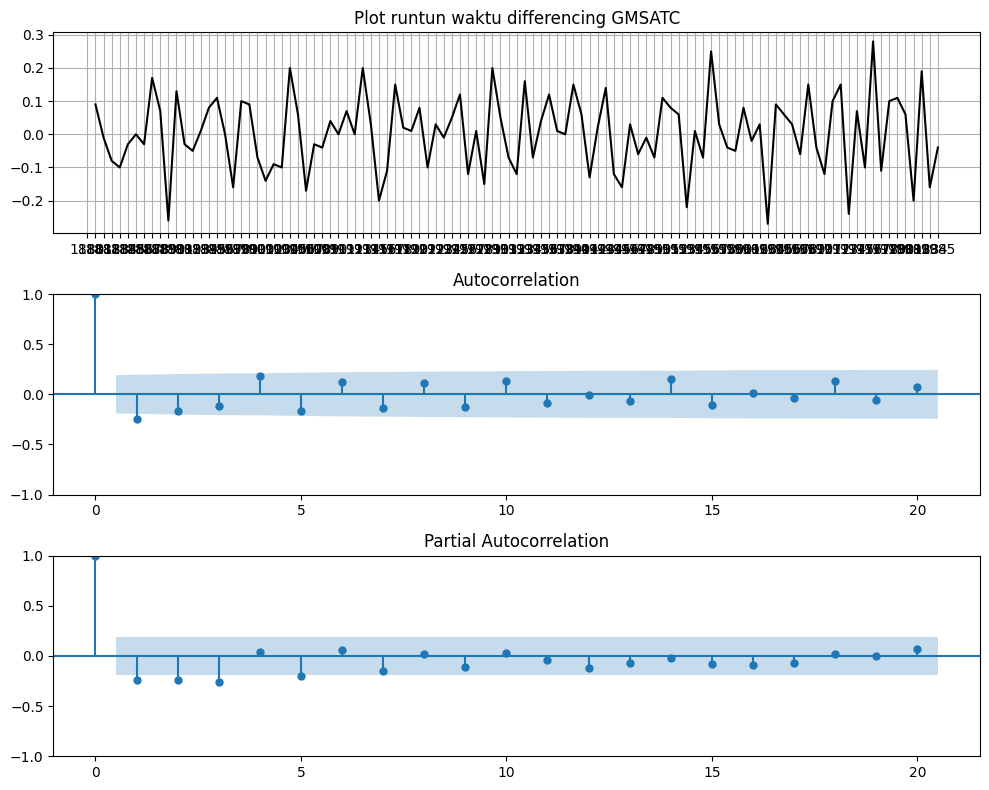

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Nama kolom sesuai isi file (13 bulan + 5 agregat + tahun di akhir)
columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
           'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON', 'Year2']

# Baca file, skip baris awal yang berisi metadata
df = pd.read_csv("Global mean surface air temp changes 1880-1985(2).txt",
                 delim_whitespace=True, skiprows=7, names=columns, engine='python')

# Gunakan kolom 'Year' dan 'J-D' (rata-rata tahunan)
df = df[['Year', 'J-D']]

# Buang baris dengan nilai J-D hilang (diwakili oleh ***** dalam file asli)
df = df[df['J-D'] != '*****']
df['J-D'] = pd.to_numeric(df['J-D'], errors='coerce')  # konversi ke numerik
df = df.dropna()

# Konversi ke derajat Celsius (data dalam 0.01 derajat)
df['TempChange'] = df['J-D'] / 100

# Differencing
df['Diff'] = df['TempChange'].diff()

# Plot
plt.figure(figsize=(10, 8))

# Plot differencing
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Diff'], color='black')
plt.title("Plot runtun waktu differencing GMSATC")
plt.grid(True)

# ACF
plt.subplot(3, 1, 2)
plot_acf(df['Diff'].dropna(), lags=20, ax=plt.gca())

# PACF
plt.subplot(3, 1, 3)
plot_pacf(df['Diff'].dropna(), lags=20, ax=plt.gca(), method='ywm')

plt.tight_layout()
plt.show()


In [70]:
!pip install PythonTsa

In [74]:
choose_arma(dtepts, max_p = 7, max_q = 7, ctrl = 1.03)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [76]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming dtepts is your differenced time series, and max_p, max_q are your chosen parameters
# Set your order for ARIMA (p, d, q)
p = 7  # Example: Max p value
q = 7  # Example: Max q value
d = 1  # Example: Differencing order (d)

# Fit the ARIMA model
model = ARIMA(dtepts, order=(p, d, q))
model_fit = model.fit()

# Implement your ctrl logic manually here if needed, e.g.:
ctrl = 1.03
# Use the model's AIC or BIC for comparison or selection if that fits your control criteria.
aic = model_fit.aic
bic = model_fit.bic

# Print or use the criteria (AIC, BIC) to compare models
print(f"AIC: {aic}, BIC: {bic}")

# Summarize the results of the ARIMA model
print(model_fit.summary())


AIC: -132.7045580472662, BIC: -93.03869456014561
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(7, 1, 7)   Log Likelihood                  81.352
Date:                Wed, 16 Apr 2025   AIC                           -132.705
Time:                        13:45:06   BIC                            -93.039
Sample:                    12-31-1881   HQIC                          -116.635
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3286      0.250     -5.308      0.000      -1.819      -0.838
ar.L2         -0.8978      0.398     -2.254      0.024      -1.678      -0.117
ar.

In [80]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dtepts, order=(1, 0, 1), trend='c')  # ARMA(1,1) = ARIMA(1,0,1)
arma11 = model.fit()
print(arma11.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  78.645
Date:                Wed, 16 Apr 2025   AIC                           -149.289
Time:                        13:51:56   BIC                           -138.673
Sample:                    12-31-1881   HQIC                          -144.987
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.011      1.358      0.174      -0.007       0.038
ar.L1          0.0026     21.065      0.000      1.000     -41.285      41.290
ma.L1          0.0026     21.066      0.000      1.0

NameError: name 'armall' is not defined

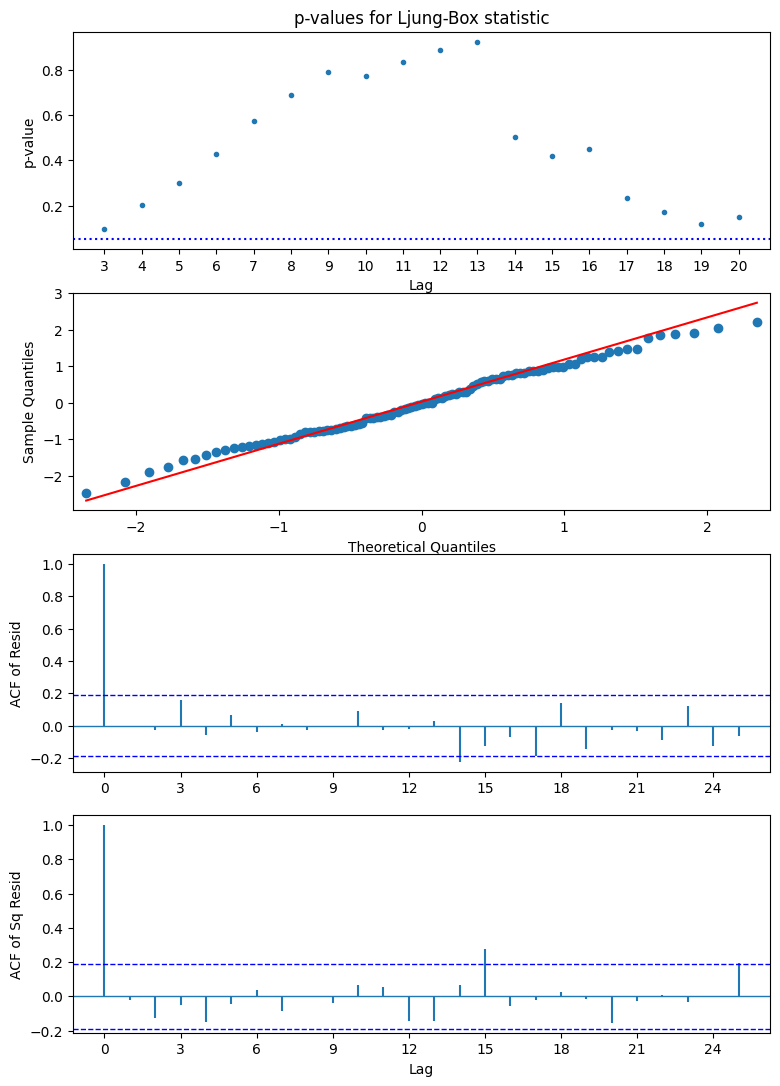

In [87]:
residll = arma11.resid
stats.normaltest(residll)
plot_ResidDiag(residll, noestimatedcoef=2, nolags=20, lag=25)
plt.savefig('Gam4-15-DiagGMSATC.pdf')

armall.plot_predict(start='1960-12', end='1990-12')
plt.savefig('Gam4-14-OutinGMSATC.pdf')
plt.show()